In [1]:
from IPython.display import Image

In [2]:
import torch
from torch.autograd import Variable

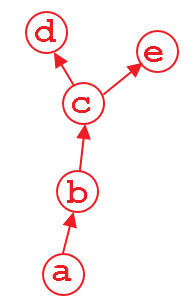

In [3]:
Image('./imgs/multi_loss.PNG')

在训练神经网络的时候往往会出现多个loss，比如分类问题中的分类loss和回归问题中的回归loss，这时候就需要将多个loss加权求和，得到最终的loss，但是也会出现多个loss分别进行反向传播，这里就需要retain_graph=True，否则会报错

In [4]:
a = torch.randn(1, 4, requires_grad=True)

In [5]:
a

tensor([[ 0.7735,  0.0485, -1.6708,  0.8571]], requires_grad=True)

In [6]:
b = a ** 2
c = b * 2

d = c.mean()
e = c.sum()

In [7]:
d, e

(tensor(2.0634, grad_fn=<MeanBackward0>),
 tensor(8.2534, grad_fn=<SumBackward0>))

In [8]:
d.backward()

In [9]:
e.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

- when we do d.backward(), that is fine
- After this computation, the parts of the graph that calculate **d will be freed by default to save memory**
- So if we do e.backward(), the error message will be pop up. In order to do e.backward(), we have to set the parameter retain_graph=True in d.backward() i.e.

In [10]:
a = torch.rand(1, 4, requires_grad=True)
b = a ** 2
c = b * 2

d = c.mean()
e = c.sum()

d.backward(retain_graph=True)
e.backward()

#### retain graph下的梯度计算

In [12]:
a = torch.tensor([1., 2., 3., 4.], requires_grad=True)
b = a ** 2
c = b * 2

d = c.mean()
e = c.sum()

d.backward(retain_graph=True)
print(a.grad)
# 两次backward之后，梯度会累加
e.backward()
print(a.grad)

tensor([1., 2., 3., 4.])
tensor([ 5., 10., 15., 20.])


https://github.com/chunhuizhang/bilibili_vlogs/blob/master/learn_torch/grad/06_retain_graph.ipynb

#### multi loss

In [13]:
# l1.backward(retain_graph=True)
# l2.backward()
#
# optimizer.step()